## Component 2 Coding : AI assignment

In [1]:
# Importing Libraries
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import v_measure_score
from sklearn.metrics import adjusted_mutual_info_score 
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import davies_bouldin_score 
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split # sci-kit Learn Library
from sklearn.preprocessing import StandardScaler # to rescaLe the numericaL data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import tree
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import StratifiedKFold 
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression # importing the Linear regression Libr 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score # importin


### Sourcing the dataframe 

In [2]:
df = pd.read_csv("Video_Games.csv")
# display the data
df. shape

(16719, 16)

### Accessing the dataframe for irregularities

In [3]:
#checking for null values 
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# checking for more info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
#Observing the inconsistency above in User score coLumn 
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

### Technical Cleaning operation begins

In [7]:
#Resolving the inconsistency and data type of the coLumn
df['User_Score'] = df['User_Score'].replace('tbd', np.nan)
df['User_Score'] = df['User_Score'].astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [9]:
#To inspect the mean,median,std and other values 
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [10]:
df.isna().sum() # Checking the dataframe again

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [11]:
#Checking for dupLicates 
df.duplicated().sum()

0

In [12]:
# Dropping the two rows with nuLL values in Name Column
del_indexOne = df[ df['Name'].isna() ].index 
df.drop(del_indexOne, inplace=True)

In [13]:
# Replacing the nuLL vaLues with the mean, median caLcuLated 
df['Critic_Score'].replace(np.nan, '69', inplace= True) 
df['Critic_Count'].replace(np.nan, '21', inplace= True) 
df['User_Count'].replace(np.nan, '24', inplace= True) 
df['User_Score'].replace(np.nan, '7.5', inplace= True)

In [14]:
# Replace null vaLues in the publisher columnn with Unknown-PubLisher 
df['Publisher'].replace (np.nan, 'Unknown-Publisher', inplace= True)

In [15]:
# Replace null vaLues in developer column with PubLisher because they are most times the same
df.loc[df['Developer'].isna(), 'Developer'] = df['Publisher']

In [16]:
# Replace null vaLues in developer column with Unknown-Developer 
df['Developer'].replace(np.nan, 'Unknown-Developer', inplace= True)

In [17]:
df.head(5027)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,69,21,7.5,24,Nintendo,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,69,21,7.5,24,Nintendo,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,MX vs. ATV Untamed,PS2,2007.0,Racing,THQ,0.32,0.01,0.00,0.05,0.38,53.0,13.0,8.2,5.0,Rainbow Studios,E
5024,Rogue Trip: Vacation 2012,PS,1998.0,Racing,GT Interactive,0.21,0.14,0.00,0.02,0.38,69,21,7.5,24,GT Interactive,NaN
5025,Phantasy Star Ø,DS,2008.0,Role-Playing,Sega,0.16,0.00,0.20,0.01,0.38,69,21,7.5,24,Sega,NaN
5026,Dawn of Discovery,PC,2009.0,Simulation,Ubisoft,0.00,0.32,0.00,0.06,0.38,82.0,32.0,8.8,132.0,"Blue Byte, Related Designs",T


In [18]:
df.query(''' `Name`.str.strip() == 'Phantasy Star Ø' ''')

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5025,Phantasy Star Ø,DS,2008.0,Role-Playing,Sega,0.16,0.0,0.2,0.01,0.38,69,21,7.5,24,Sega,NaN


### Checking the dataframe again

In [19]:
df.isna().sum() # Checking the dataframe again

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer             0
Rating             6767
dtype: int64

### Converting the datatype of Year of Release to int

In [20]:
# Converting the datatype of Year of Release to float 
df['Year_of_Release'] = df['Year_of_Release'].astype(float)

In [21]:
df['Year_of_Release'].replace (np.nan, '2007', inplace= True)

In [22]:
df['Year_of_Release'] = df['Year_of_Release'].astype(int)

### Replacing the null value in Rating with 'E'

In [23]:
df['Rating'].replace (np.nan, 'E', inplace= True)

In [24]:
# check for any empty space in Year_of_Release
df.query(''' `Year_of_Release` == ' ' ''')

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating


In [25]:
# query the original dataframe to get the Year_of_Release that have NaN values
df.query(''' `Year_of_Release`.isna() ''')

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating


In [26]:
df.isna().sum() # Checking the dataframe again

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

### Converting the datatype of Critic and User_Scores and User_Counts all to float to be useful

In [28]:
# Converting the datatype of Critic and User_Scores and User_Counts all to float 
df['Critic_Score'] = df['Critic_Score'].astype(float) 
df['Critic_Count'] = df['Critic_Count'].astype(float) 
df['User_Score'] = df['User_Score'].astype(float) 
df['User_Count'] = df['User_Count'].astype(float)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16717 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16717 non-null  object 
 2   Year_of_Release  16717 non-null  int32  
 3   Genre            16717 non-null  object 
 4   Publisher        16717 non-null  object 
 5   NA_Sales         16717 non-null  float64
 6   EU_Sales         16717 non-null  float64
 7   JP_Sales         16717 non-null  float64
 8   Other_Sales      16717 non-null  float64
 9   Global_Sales     16717 non-null  float64
 10  Critic_Score     16717 non-null  float64
 11  Critic_Count     16717 non-null  float64
 12  User_Score       16717 non-null  float64
 13  User_Count       16717 non-null  float64
 14  Developer        16717 non-null  object 
 15  Rating           16717 non-null  object 
dtypes: float64(9), int32(1), object(6)
memory usage: 2.6+ MB


In [31]:
df_numeric = df.select_dtypes(exclude = "object")

<Axes: >

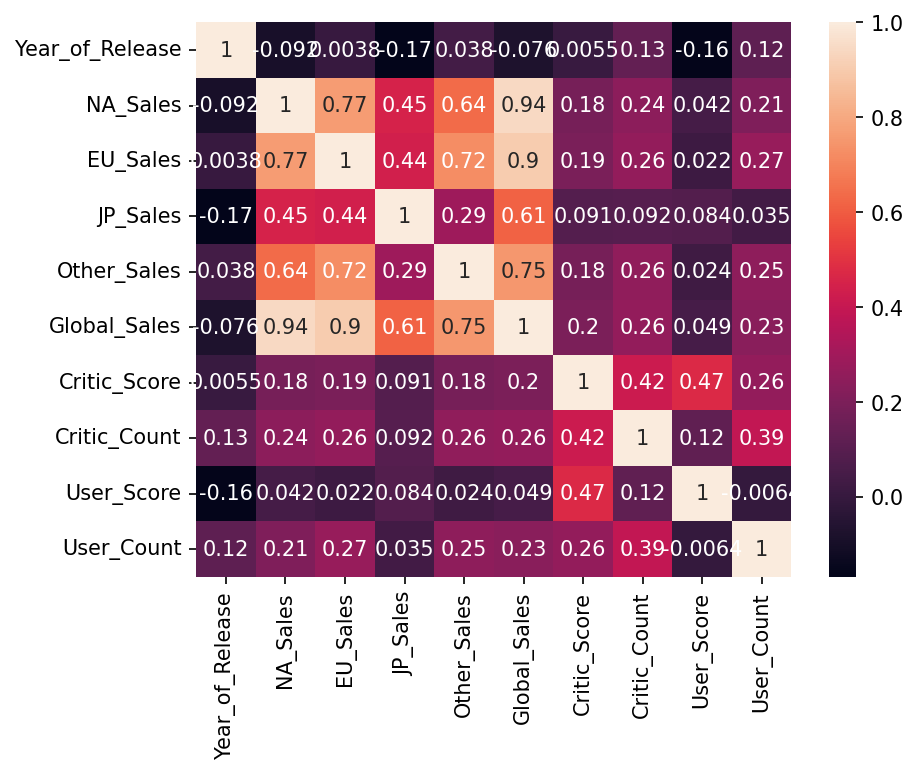

In [42]:
#Checking the correLation between the columns 
plt.figure(dpi=150)
sns.heatmap(df_numeric.corr(), annot = True)

### (a) Checking which variables/columns in the video game dataset or a combination of them best predicts "global sales"


In [43]:
# Split data into input and output variables represented as X and y
X = df_numeric.drop(['Global_Sales'], axis = 1)
y = df_numeric['Global_Sales'] # value to be predicted

In [45]:
# Split data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling the dataset

In [46]:
#To use reguLarization, we can appLy StandardScaLer 
scale = StandardScaler()
scale.fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

In [47]:
#converting to pandas dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

### Checking North America Sales against Global Sales

In [56]:
X_train_scaled['NA_Sales'].shape
# Reshaping the attribute
X_train_scaled_yt = X_train_scaled['NA_Sales'].to_numpy().reshape(-1,1)
X_test_scaled_yt = X_test_scaled['NA_Sales'].to_numpy().reshape(-1,1)
NA_Sales = LinearRegression() # fitting the modeL to a dataset using the LinearRegression
# Train the modeL using the training sets
NA_Sales.fit(X_train_scaled_yt,y_train)
intercept = NA_Sales.intercept_
coefficient = NA_Sales.coef_
linear_model = 'Sales = {:.2f} + {:.2f}*NA_Sales'.format(intercept, coefficient[0])
Sales_pred = NA_Sales.predict(X_test_scaled_yt)
# The mean absolute error
mean_abs = mean_absolute_error(y_test,Sales_pred)
# The mean squared error
mean_squared = mean_squared_error(y_test,Sales_pred)
print(f"The result of the mean absolute error is: {mean_abs:.2f}")
print(f"The result of the mean squared error is : {mean_squared:.2f}")
print(f"The result of the root mean squared error is :{np.sqrt(mean_squared):.2f}")
print(f"The result of the coefficient of determination is: {r2_score(y_test,Sales_pred):.2f}")

The result of the mean absolute error is: 0.20
The result of the mean squared error is : 0.29
The result of the root mean squared error is :0.54
The result of the coefficient of determination is: 0.93


### Checking EU Sales against Global sales

In [59]:
X_train_scaled['EU_Sales'].shape
# Reshaping the attribute
X_train_scaled_yt = X_train_scaled['EU_Sales'].to_numpy().reshape(-1,1)
X_test_scaled_yt = X_test_scaled['EU_Sales'].to_numpy().reshape(-1,1)
EU_Sales =LinearRegression() # fitting the modeL to a dataset using the LinearRegression
# Train the modeL using the training sets
EU_Sales.fit(X_train_scaled_yt,y_train)
intercept = EU_Sales.intercept_
coefficient = EU_Sales.coef_
linear_model = 'Sales = {:.2f} + {:.2f}*EU_Sales'.format(intercept, coefficient[0])
Sales_pred = EU_Sales.predict(X_test_scaled_yt)
# The mean absoLute error
mean_abs = mean_absolute_error(y_test, Sales_pred)
# The mean squared error
mean_squared = mean_squared_error(y_test,Sales_pred)
print(f"The result of the mean absolute error is: {mean_abs:.2f}")
print(f"The result of the mean squared error is : {mean_squared:.2f}")
print(f"The result of the root mean squared error is : {np.sqrt(mean_squared):.2f}") 
print(f"The result of the coefficient of determination is: {r2_score(y_test,Sales_pred):.2f}")

The result of the mean absolute error is: 0.24
The result of the mean squared error is : 0.30
The result of the root mean squared error is : 0.55
The result of the coefficient of determination is: 0.93


### Checking Japan sales against Global sales

In [61]:
X_train_scaled['JP_Sales'].shape
# Reshaping the attribute
X_train_scaled_yt = X_train_scaled['JP_Sales'].to_numpy().reshape(-1,1)
X_test_scaled_yt = X_test_scaled['JP_Sales'].to_numpy().reshape(-1,1)
JP_Sales = LinearRegression() # fitting the modeL to a dataset using the LinearRegression
# Train the modeL using the training sets
JP_Sales.fit(X_train_scaled_yt,y_train)
intercept = JP_Sales.intercept_
coefficient = JP_Sales.coef_
linear_model = 'Sales = {:.2f} + {:.2f}*JP_Sales'.format(intercept, coefficient[0])
Sales_pred = JP_Sales.predict(X_test_scaled_yt)
# The mean absoLute error
mean_abs = mean_absolute_error(y_test,Sales_pred)
# The mean squared error
mean_squared = mean_squared_error(y_test,Sales_pred)
print(f"The result of the mean absolute error is: {mean_abs:.2f}")
print(f"The result of the mean squared error is : {mean_squared:.2f}")
print(f"The result of the root mean squared error is : {np.sqrt(mean_squared):.2f}") 
print(f"The result of the coefficient of determination is: {r2_score(y_test,Sales_pred):.2f}")

The result of the mean absolute error is: 0.52
The result of the mean squared error is : 2.82
The result of the root mean squared error is : 1.68
The result of the coefficient of determination is: 0.32


In [ ]:
X_train_scaled['Other_Sales1].shape
#	Reshaping the attribute
X_train_scaled_yt = X_train_scaledrOther_Salesl.to_numpy().reshape(-1,1) X_test_scaled_yt	X_test_scaled[10ther_Sales'].to_numpy().reshape(-1,1)
Other_Sales	LinearRegression() # fitting the modeL to a dataset using the LinearRegres
#	Train the modeL using the training sets
Other_Sales.fit(X_train_scaled_yt,y_train)
intercept	Other_Sales.intercept_
coefficient Other_Sales.coef_
linear_model	'Sales = {:.2f} + {:.2f}*Other_Sales'.format(intercept, coefficient[0])
Sales_pred	Other_Sales.predict(X_test_scaled_yt)
#	The mean absoLute error
mean_abs = mean_absolute_error(y_test,Sales_pred)
#	The mean squared error
mean_squared = mean_squared_error(y_test,Sales_pred)
print(f"The result of the mean absolute error is: {mean_abs:.2f}")
print(f"The result of the mean squared error is : {mean_squared:.2f}")
print(f"The result of the root mean squared error is : {np.sqrt(mean_squared):.2f}") print(f"The result of the coefficient of determination is: {r2_score(y_test,Sales_pred):